File Upload


In [ ]:
! gdown --id 14ClyyyG-In58nThU-LHCyUbMfsm1dfmm

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14ClyyyG-In58nThU-LHCyUbMfsm1dfmm
To: /content/Car_sale_ads.csv
100% 166M/166M [00:01<00:00, 131MB/s]



#Uploading all necessary liblaries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import confusion_matrix
import lightgbm as lgb

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor

In [ ]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

#reading the file and looking at the data

In [ ]:
cs = pd.read_csv('Car_sale_ads.csv')
cs.head(3)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."



#Liblaries for preprocessing

In [ ]:
cs = cs.dropna()
cs.shape

(9107, 25)

#creating charts for data understanding


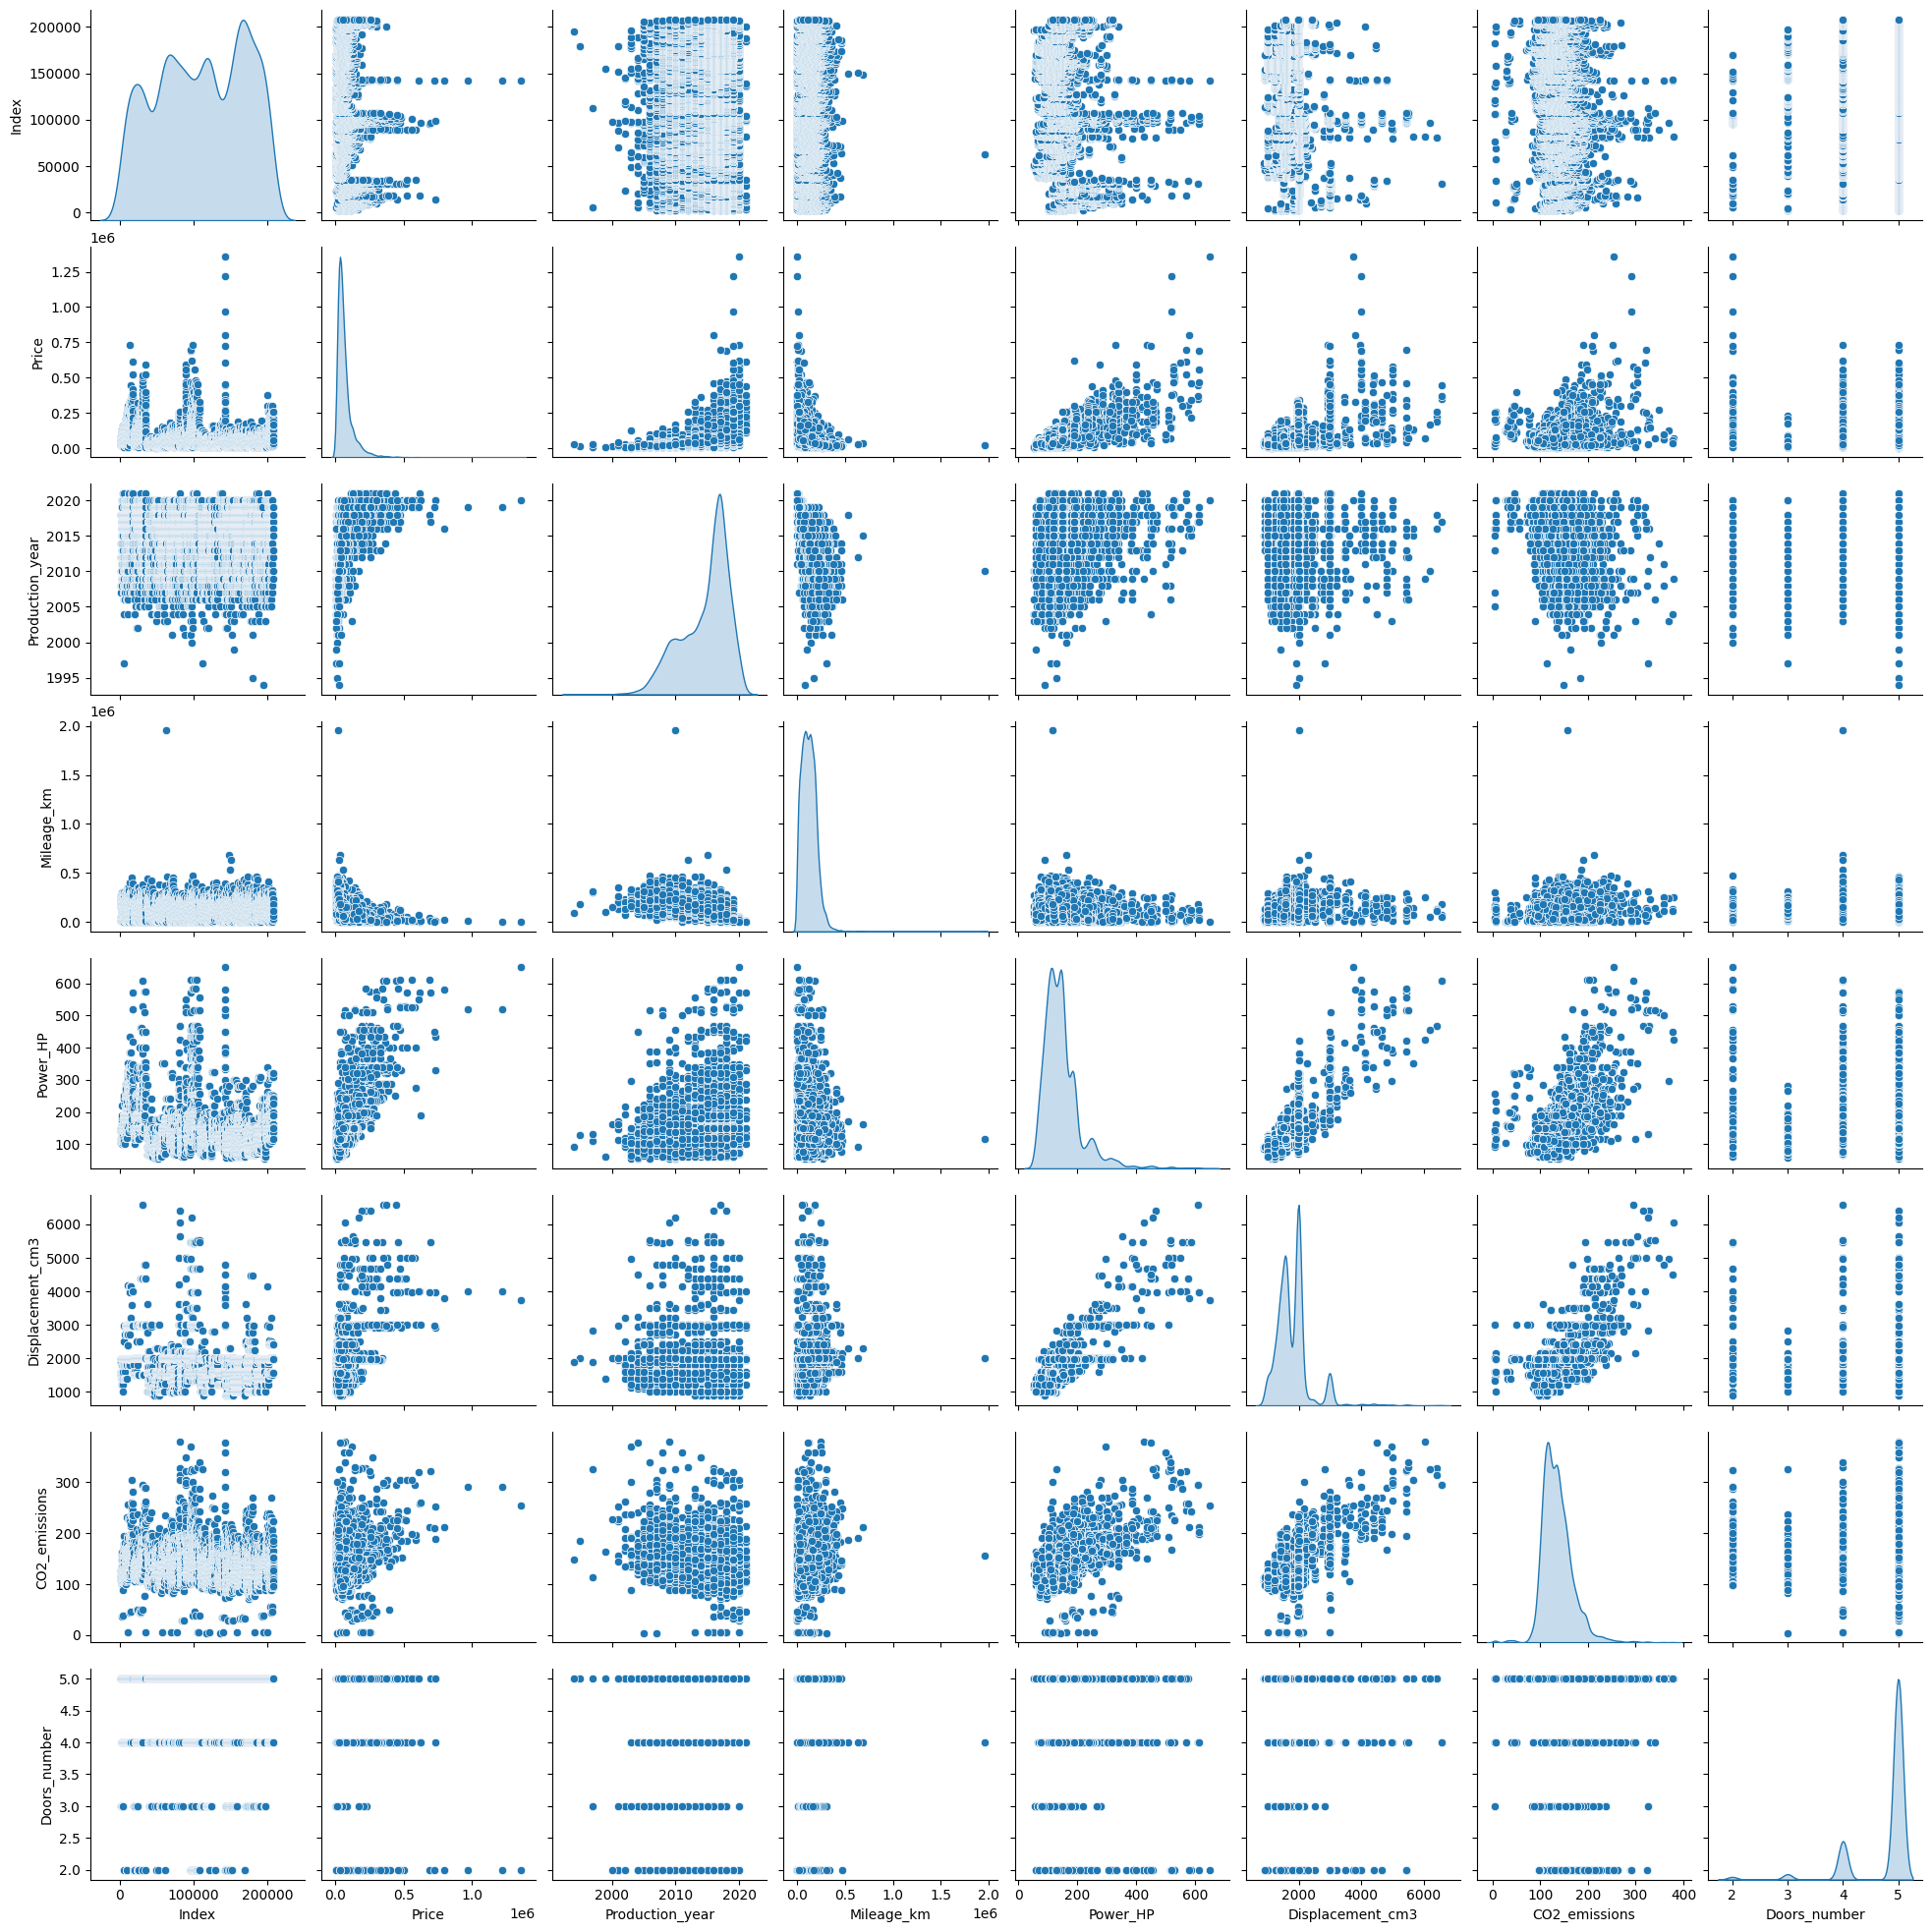

In [ ]:
sns.pairplot(data = cs, diag_kind = 'kde')

#creating chart for overview of price values distribution


In [ ]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [ ]:
cs

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
1982,1982,17950,PLN,Used,Audi,A3,1.9 TDI DPF Attraction,8P (2003-2012),2010,147000.0,105.0,1896.0,Diesel,124.0,Front wheels,Manual,compact,3.0,gray,Belgium,Yes,14/07/2010,03/05/2021,"Ul.Tczewska 50 - 86-170 Nowe, świecki, Kujawsk...","['ABS', 'Electric front windows', 'Drivers air..."
2003,2003,47900,PLN,Used,Audi,A3,30 TDI Sportback,8V (2012-),2018,10000.0,116.0,1598.0,Diesel,114.0,Front wheels,Manual,compact,5.0,black,France,Yes,28/09/2018,02/05/2021,"Łęgowo 23/5 - 62-100 Wągrowiec, wągrowiecki, W...","['ABS', 'Electric front windows', 'Drivers air..."
2019,2019,22990,PLN,Used,Audi,A3,2.0 TDI Sportback DPF,8P (2003-2012),2007,256000.0,140.0,1968.0,Diesel,115.0,Front wheels,Manual,city_cars,5.0,black,Germany,Yes,05/04/2007,02/05/2021,"Piłsudskiego 89 - 86-300 Grudziądz, Kujawsko-p...","['ABS', 'Electric front windows', 'Drivers air..."
2072,2072,35900,PLN,Used,Audi,A3,2.0 TDI Sportback DPF,8P (2003-2012),2012,244000.0,140.0,1968.0,Diesel,115.0,Front wheels,Manual,compact,5.0,black,Germany,Yes,11/09/2012,01/05/2021,"Świdrówka 109C - 33-230 Szczucin, dąbrowski, M...","['ABS', 'Electric front windows', 'Drivers air..."
2077,2077,52900,PLN,Used,Audi,A3,2.0 TDI Ambition,8V (2012-),2014,188000.0,150.0,1968.0,Diesel,108.0,Front wheels,Manual,compact,5.0,white,Germany,Yes,28/02/2014,03/05/2021,"Mysłowice, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208123,208123,79777,PLN,Used,Volvo,S80,T5 Momentum,II (2006-),2015,151000.0,240.0,1999.0,Gasoline,184.0,Front wheels,Automatic,sedan,4.0,gray,Poland,Yes,16/09/2015,02/05/2021,"Radzymińska 278 - 03-694 Warszawa, Targówek (P...","['ABS', 'Electric front windows', 'Drivers air..."
208148,208148,29900,PLN,Used,Volvo,S80,2.0D Summum,II (2006-),2010,229105.0,136.0,1997.0,Diesel,151.0,Front wheels,Manual,sedan,4.0,golden,Netherlands,Yes,29/11/2008,04/05/2021,Międzyrzec Podl Lubelska 33 DRELÓW Zachodnia 6...,"['ABS', 'Electric front windows', 'Drivers air..."
208150,208150,36800,PLN,Used,Volvo,V40,D2 Momentum,II (2012-),2013,180000.0,115.0,1560.0,Diesel,105.0,Front wheels,Automatic,compact,5.0,silver,Germany,Yes,02/12/2013,30/04/2021,"Bieszczadzka 73 - 38-530 Zarszyn, sanocki, Pod...","['ABS', 'Electric front windows', 'Drivers air..."
208152,208152,58000,PLN,Used,Volvo,V40,D3 Drive-E Kinetic,II (2012-),2016,63000.0,150.0,1969.0,Diesel,95.0,Front wheels,Manual,compact,5.0,other,Poland,Yes,28/06/2016,01/05/2021,"Siedlce, Mazowieckie","['ABS', 'Electric front windows', 'Drivers air..."


Data Types Check

In [ ]:
cs.dtypes

Index                        int64
Price                        int64
Currency                    object
Condition                   object
Vehicle_brand               object
Vehicle_model               object
Vehicle_version             object
Vehicle_generation          object
Production_year              int64
Mileage_km                 float64
Power_HP                   float64
Displacement_cm3           float64
Fuel_type                   object
CO2_emissions              float64
Drive                       object
Transmission                object
Type                        object
Doors_number               float64
Colour                      object
Origin_country              object
First_owner                 object
First_registration_date     object
Offer_publication_date      object
Offer_location              object
Features                    object
dtype: object

Data Check

In [ ]:
nu_col = cs.nunique()
print(nu_col)

Index                      9107
Price                      2023
Currency                      2
Condition                     2
Vehicle_brand                32
Vehicle_model               194
Vehicle_version            3583
Vehicle_generation          314
Production_year              26
Mileage_km                 4477
Power_HP                    226
Displacement_cm3            196
Fuel_type                     5
CO2_emissions               225
Drive                         5
Transmission                  2
Type                          9
Doors_number                  4
Colour                       14
Origin_country               22
First_owner                   1
First_registration_date    3418
Offer_publication_date       27
Offer_location             2481
Features                   8626
dtype: int64


#understanding the data structure and looking at car price distribution


In [ ]:
df1=cs.drop(['Vehicle_version', 'Vehicle_generation','CO2_emissions','Origin_country','First_owner','First_registration_date'], axis=1)


In [ ]:
nu_col1 = df1.nunique()
print(nu_col1)

Index                     9107
Price                     2023
Currency                     2
Condition                    2
Vehicle_brand               32
Vehicle_model              194
Production_year             26
Mileage_km                4477
Power_HP                   226
Displacement_cm3           196
Fuel_type                    5
Drive                        5
Transmission                 2
Type                         9
Doors_number                 4
Colour                      14
Offer_publication_date      27
Offer_location            2481
Features                  8626
dtype: int64


In [ ]:
df1['Mileage_km']=df1['Mileage_km'].fillna(df1['Mileage_km'].mean())
df1['Power_HP']=df1['Power_HP'].fillna(df1['Power_HP'].mean())
df1['Displacement_cm3']=df1['Displacement_cm3'].fillna(df1['Displacement_cm3'].mean())

In [ ]:
df1.corr()

<ipython-input-21-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number
Index,1.000000,-0.207358,-0.001348,0.032977,-0.256300,-0.237150,0.092527
Price,-0.207358,1.000000,0.467099,-0.385035,0.749099,0.576739,-0.190794
Production_year,-0.001348,0.467099,1.000000,-0.599922,0.170316,-0.025895,0.038158
Mileage_km,0.032977,-0.385035,-0.599922,1.000000,-0.085244,0.119282,0.019035
Power_HP,-0.256300,0.749099,0.170316,-0.085244,1.000000,0.850327,-0.195331
Displacement_cm3,-0.237150,0.576739,-0.025895,0.119282,0.850327,1.000000,-0.183976
Doors_number,0.092527,-0.190794,0.038158,0.019035,-0.195331,-0.183976,1.000000


<ipython-input-22-3ed1a1a51dc0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr())


<Axes: >

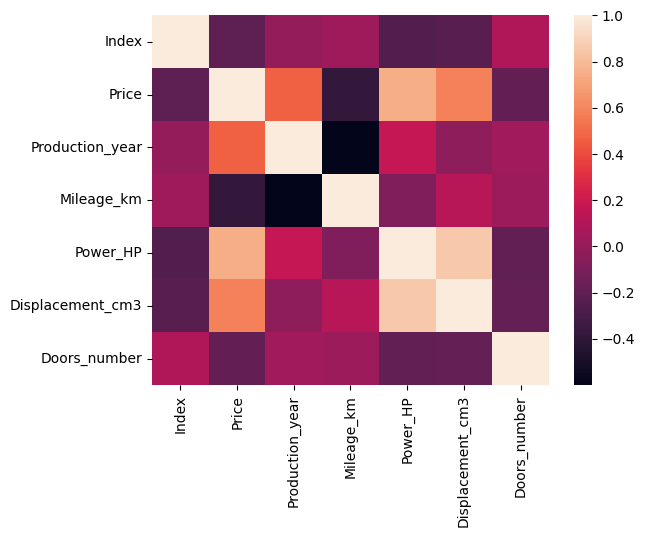

In [ ]:
sns.heatmap(df1.corr())

<Axes: xlabel='Price'>

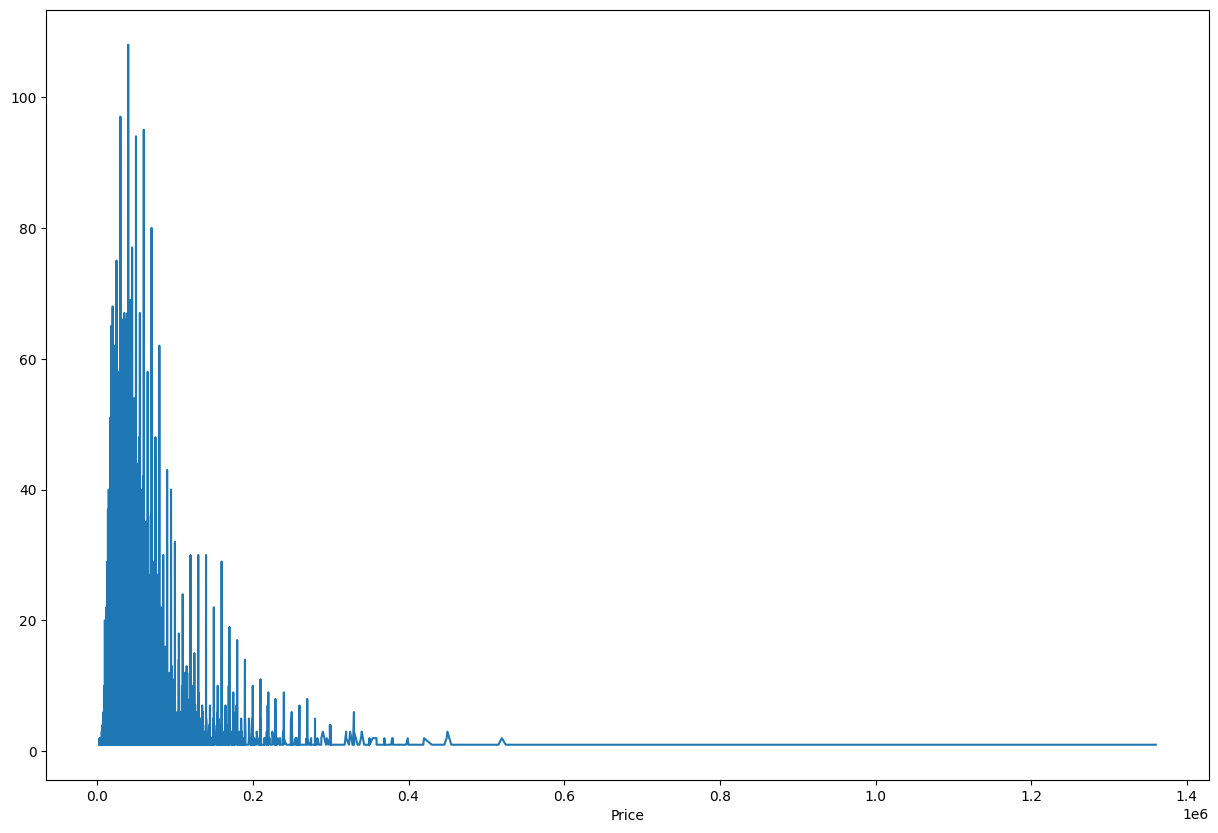

In [ ]:
df1.groupby('Price')['Index'].count().plot(figsize=(15,10))

<Axes: ylabel='Index'>

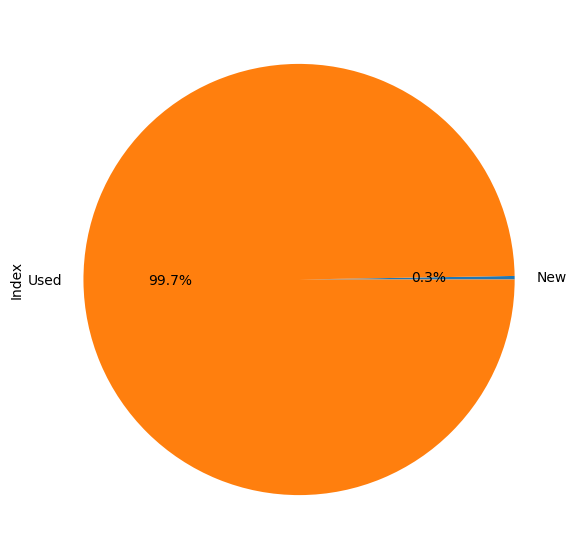

In [ ]:
df1.groupby('Condition')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")


<Axes: xlabel='Vehicle_brand'>

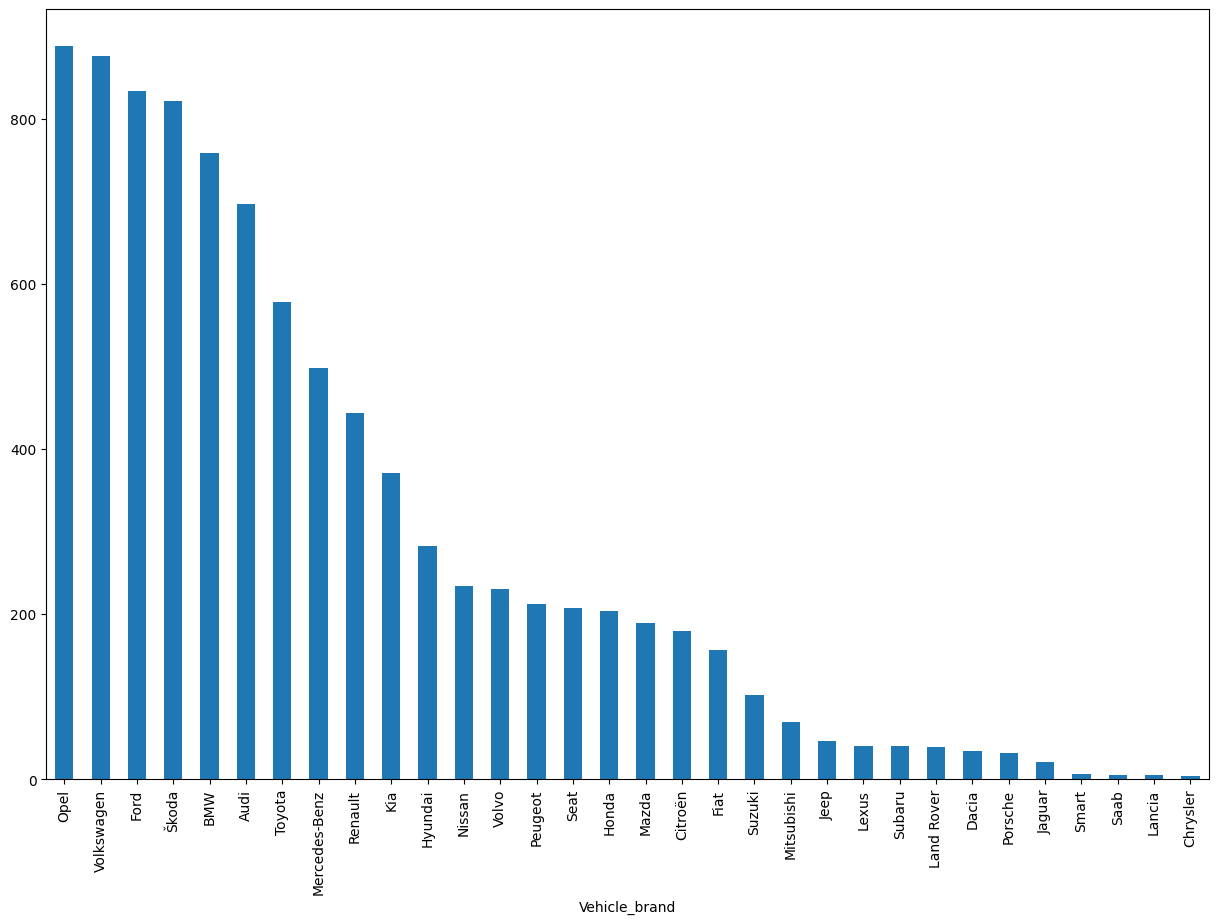

In [ ]:
df1.groupby('Vehicle_brand')['Index'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(15,10))


<Axes: xlabel='Vehicle_model'>

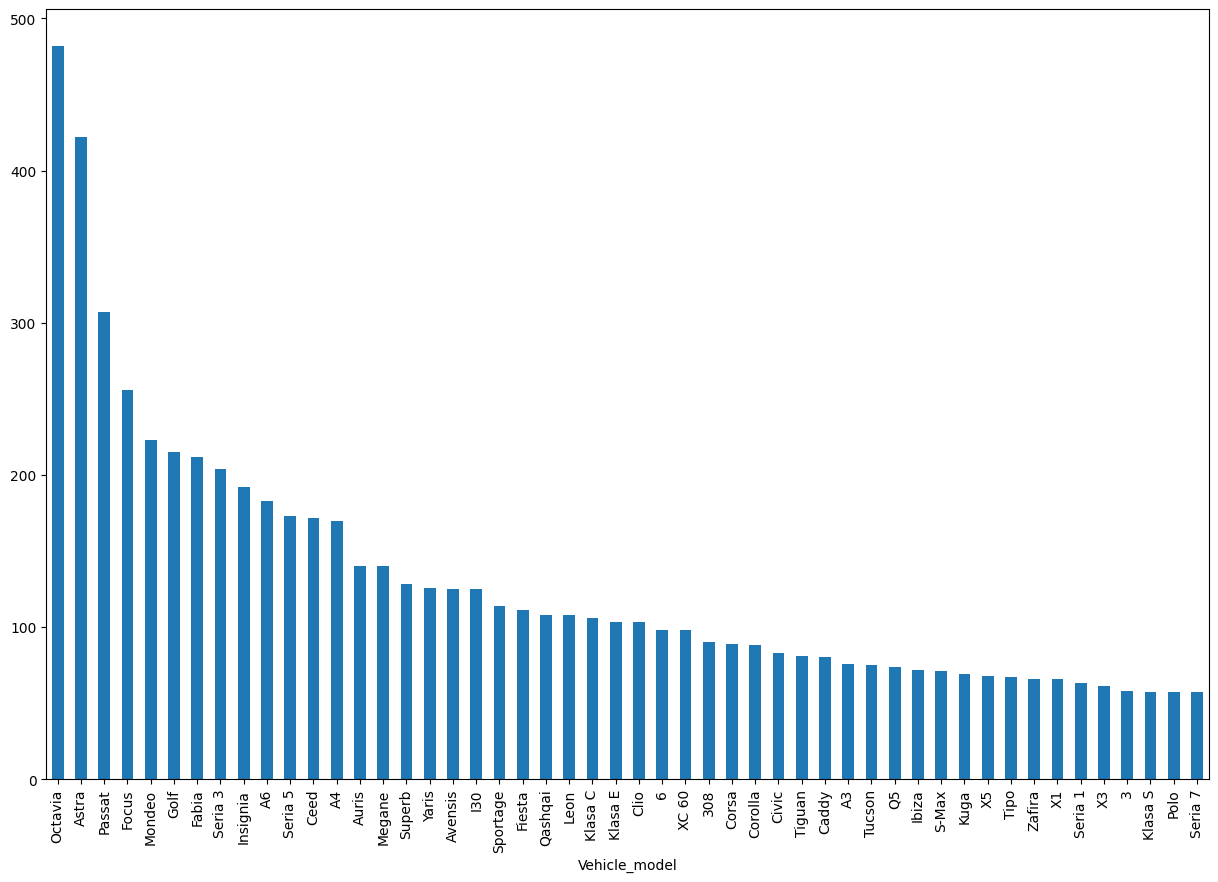

In [ ]:
df1.groupby('Vehicle_model')['Index'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(15,10))


<Axes: xlabel='Production_year'>

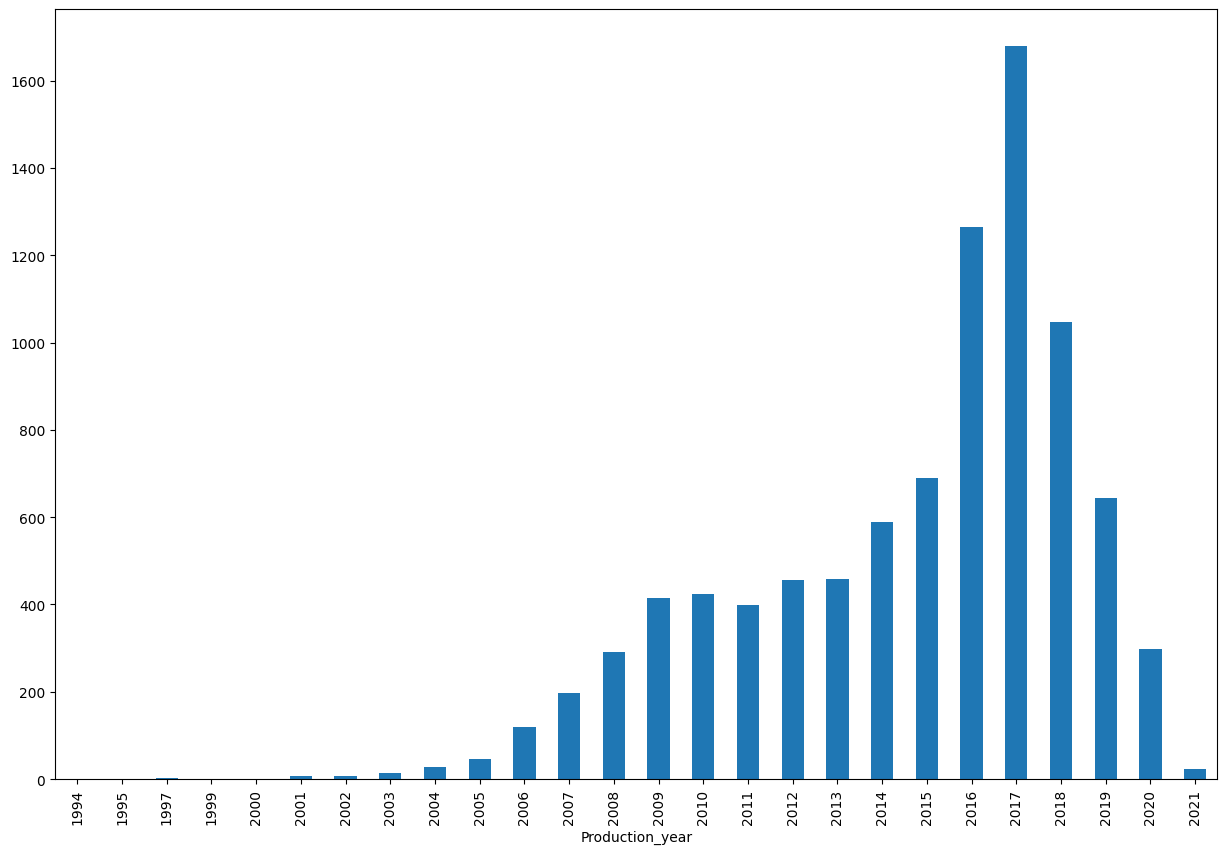

In [ ]:
df1.groupby('Production_year')['Index'].count().plot.bar(figsize=(15,10))


<Axes: ylabel='Index'>

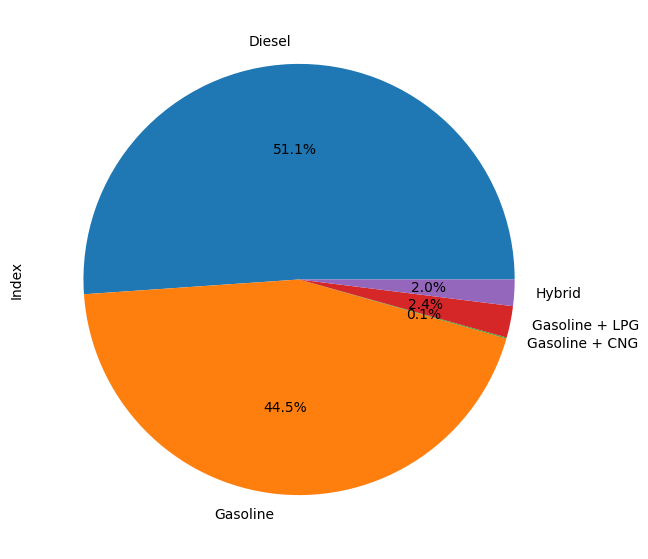

In [ ]:
df1.groupby('Fuel_type')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")


<Axes: ylabel='Index'>

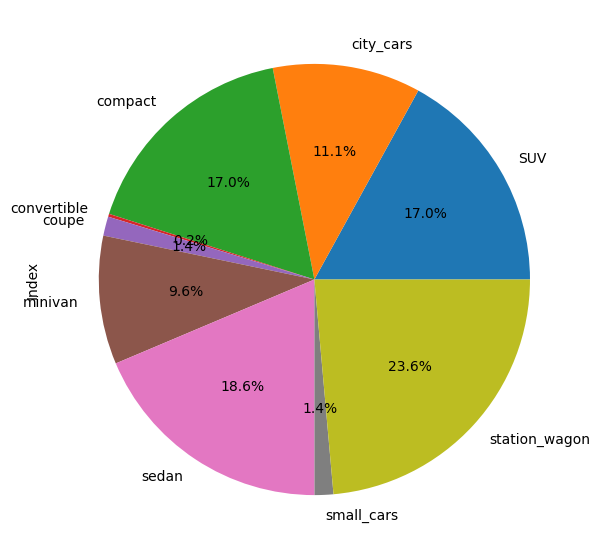

In [ ]:
df1.groupby('Type')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")


In [ ]:
df1.describe()


,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number
count,9107.000000,9.107000e+03,9107.000000,9.107000e+03,9107.000000,9107.000000,9107.000000
mean,110093.761283,6.841361e+04,2014.667618,1.217409e+05,148.585813,1789.741627,4.769298
std,59260.802032,6.793572e+04,3.698423,7.647450e+04,66.152286,558.869226,0.533554
min,1982.000000,2.300000e+03,1994.000000,1.000000e+00,54.000000,875.000000,2.000000
25%,61943.000000,2.990000e+04,2012.000000,6.371750e+04,109.000000,1461.000000,5.000000
50%,113539.000000,4.890000e+04,2016.000000,1.170000e+05,136.000000,1598.000000,5.000000
75%,163976.500000,7.990000e+04,2017.000000,1.710000e+05,170.000000,1995.000000,5.000000
max,208159.000000,1.360000e+06,2021.000000,1.954026e+06,650.000000,6592.000000,5.000000


In [ ]:
df1.groupby('Currency').count()


,Index,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Offer_location,Features
Currency,,,,,,,,,,,,,,,,,,
EUR,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
PLN,9099,9099,9099,9099,9099,9099,9099,9099,9099,9099,9099,9099,9099,9099,9099,9099,9099,9099


In [ ]:
df2=pd.DataFrame(df1['Vehicle_brand'].value_counts())


In [ ]:
df2['index']=df2.index


In [ ]:
df2 = df2.rename(columns={'Vehicle_brand': 'num','index':'Vehicle_brand'})


In [ ]:
df1=pd.merge(df1, df2, how='left', on ='Vehicle_brand')


In [ ]:
def rank(ex):
    if ex<=100:
        return 0
    elif 100<ex<=500:
        return 1
    elif 500<ex<=1000:
        return 2
    elif 1000<ex<=2000:
        return 3
    elif 2000<ex<=5000:
        return 4
    else:
        return 5

In [ ]:
df1.loc[:,'Brand_popularity']=df1['num'].apply(rank)


<Axes: xlabel='Brand_popularity'>

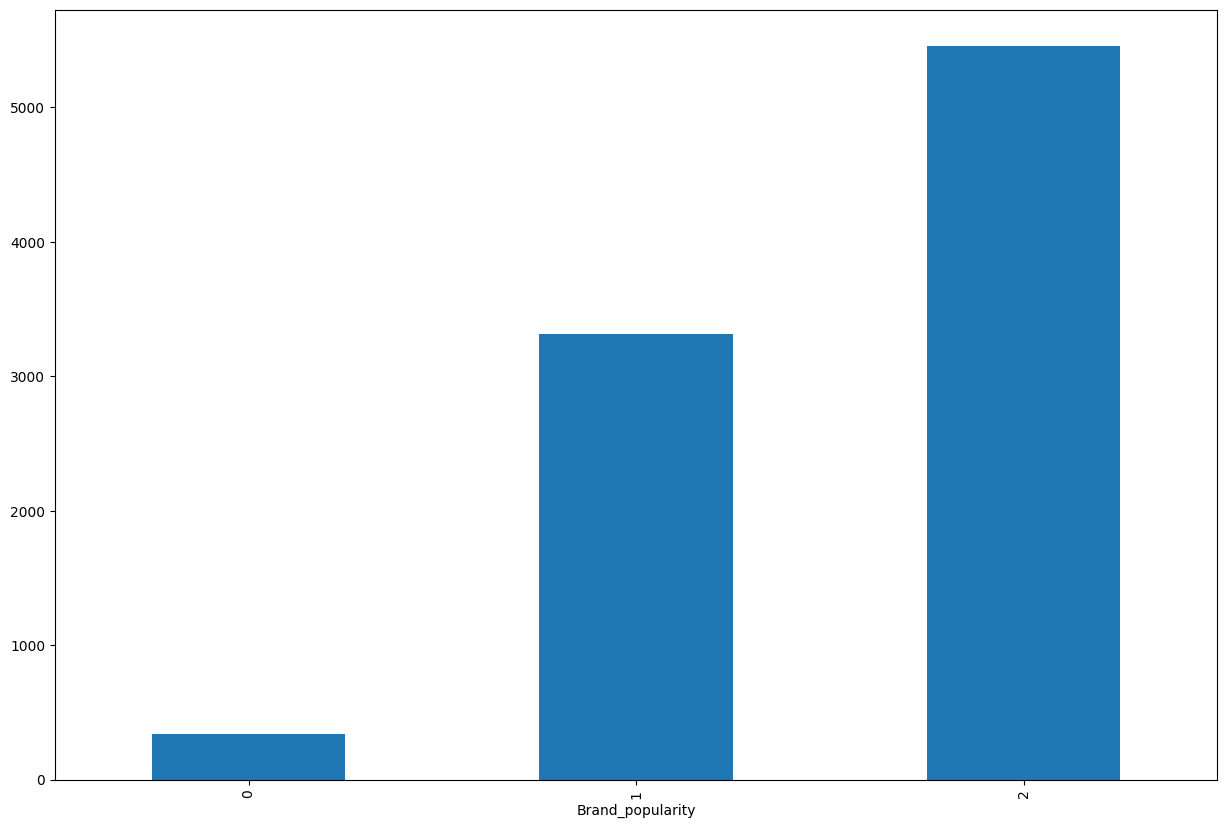

In [ ]:
df1.groupby('Brand_popularity')['Index'].count().plot.bar(figsize=(15,10))


In [ ]:
df1.corr()


<ipython-input-39-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,num,Brand_popularity
Index,1.000000,-0.207358,-0.001348,0.032977,-0.256300,-0.237150,0.092527,0.044953,-0.004531
Price,-0.207358,1.000000,0.467099,-0.385035,0.749099,0.576739,-0.190794,-0.028586,-0.064188
Production_year,-0.001348,0.467099,1.000000,-0.599922,0.170316,-0.025895,0.038158,0.076085,0.071274
Mileage_km,0.032977,-0.385035,-0.599922,1.000000,-0.085244,0.119282,0.019035,0.074290,0.059861
Power_HP,-0.256300,0.749099,0.170316,-0.085244,1.000000,0.850327,-0.195331,0.013800,-0.039057
Displacement_cm3,-0.237150,0.576739,-0.025895,0.119282,0.850327,1.000000,-0.183976,-0.024492,-0.067730
Doors_number,0.092527,-0.190794,0.038158,0.019035,-0.195331,-0.183976,1.000000,-0.000810,0.024367
num,0.044953,-0.028586,0.076085,0.074290,0.013800,-0.024492,-0.000810,1.000000,0.916002
Brand_popularity,-0.004531,-0.064188,0.071274,0.059861,-0.039057,-0.067730,0.024367,0.916002,1.000000


In [ ]:
df3=df1.drop(['Currency','Vehicle_brand','Vehicle_model','Offer_publication_date','Offer_location','Features','num'], axis=1)


In [ ]:
df3

,Index,Price,Condition,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Brand_popularity
0,1982,17950,Used,2010,147000.0,105.0,1896.0,Diesel,Front wheels,Manual,compact,3.0,gray,2
1,2003,47900,Used,2018,10000.0,116.0,1598.0,Diesel,Front wheels,Manual,compact,5.0,black,2
2,2019,22990,Used,2007,256000.0,140.0,1968.0,Diesel,Front wheels,Manual,city_cars,5.0,black,2
3,2072,35900,Used,2012,244000.0,140.0,1968.0,Diesel,Front wheels,Manual,compact,5.0,black,2
4,2077,52900,Used,2014,188000.0,150.0,1968.0,Diesel,Front wheels,Manual,compact,5.0,white,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9102,208123,79777,Used,2015,151000.0,240.0,1999.0,Gasoline,Front wheels,Automatic,sedan,4.0,gray,1
9103,208148,29900,Used,2010,229105.0,136.0,1997.0,Diesel,Front wheels,Manual,sedan,4.0,golden,1
9104,208150,36800,Used,2013,180000.0,115.0,1560.0,Diesel,Front wheels,Automatic,compact,5.0,silver,1
9105,208152,58000,Used,2016,63000.0,150.0,1969.0,Diesel,Front wheels,Manual,compact,5.0,other,1


In [ ]:
df3=pd.get_dummies(df3)


In [ ]:
df3

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Brand_popularity,Condition_New,Condition_Used,Fuel_type_Diesel,Fuel_type_Gasoline,Fuel_type_Gasoline + CNG,Fuel_type_Gasoline + LPG,Fuel_type_Hybrid,Drive_4x4 (attached automatically),Drive_4x4 (attached manually),Drive_4x4 (permanent),Drive_Front wheels,Drive_Rear wheels,Transmission_Automatic,Transmission_Manual,Type_SUV,Type_city_cars,Type_compact,Type_convertible,Type_coupe,Type_minivan,Type_sedan,Type_small_cars,Type_station_wagon,Colour_beige,Colour_black,Colour_blue,Colour_brown,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
0,1982,17950,2010,147000.0,105.0,1896.0,3.0,2,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2003,47900,2018,10000.0,116.0,1598.0,5.0,2,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2019,22990,2007,256000.0,140.0,1968.0,5.0,2,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2072,35900,2012,244000.0,140.0,1968.0,5.0,2,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2077,52900,2014,188000.0,150.0,1968.0,5.0,2,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9102,208123,79777,2015,151000.0,240.0,1999.0,4.0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9103,208148,29900,2010,229105.0,136.0,1997.0,4.0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9104,208150,36800,2013,180000.0,115.0,1560.0,5.0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9105,208152,58000,2016,63000.0,150.0,1969.0,5.0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


<Axes: >

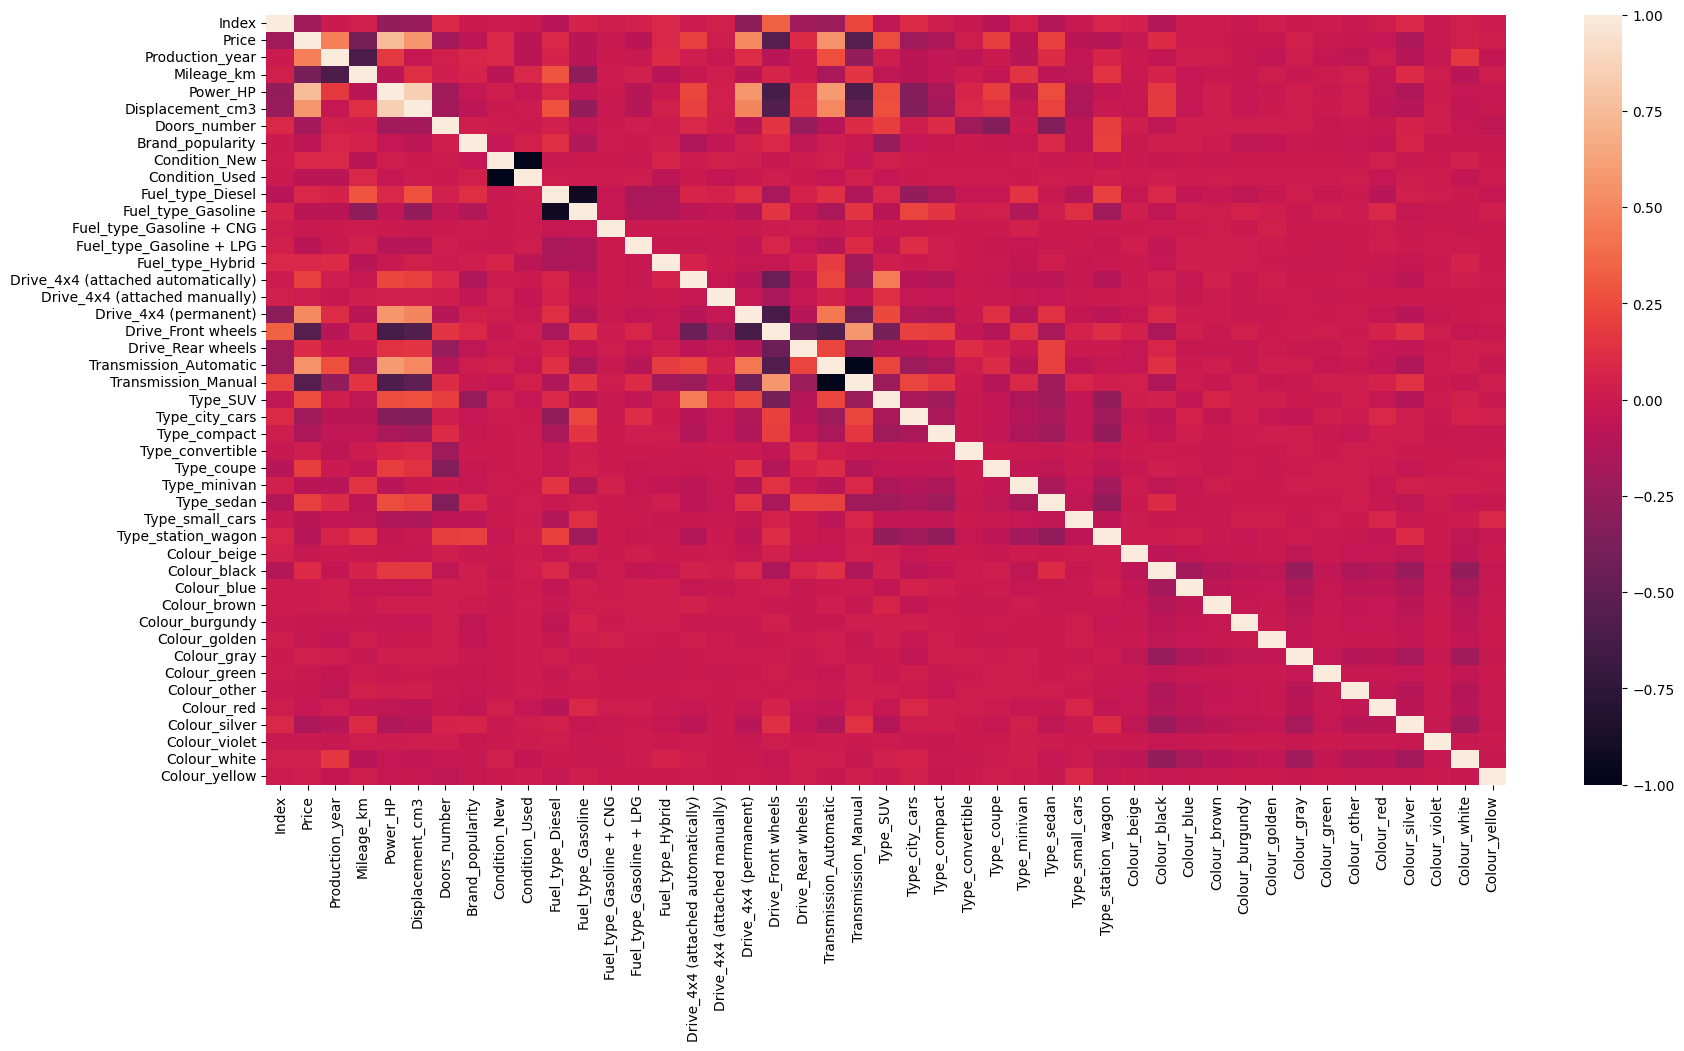

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df3.corr())

In [ ]:
x=df3.drop(['Price'], axis=1)
y=df3['Price']

 #Removing outliers

In [ ]:
x=pd.get_dummies(x)
x.shape

(9107, 44)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y,train_size=0.8,random_state=123)

In [ ]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test)

In [ ]:
params={'metric': 'rmse'}

In [ ]:
scaler=StandardScaler()
x_train_sc=pd.DataFrame(scaler.fit_transform(x_train))
x_test_sc=pd.DataFrame(scaler.transform(x_test))

In [ ]:
model1=LinearRegression()
model2=Lasso(alpha=1.0)
model3=Ridge(alpha=0.1)

In [ ]:
scores=[]
kf=KFold(n_splits=4,shuffle=True,random_state=71)
for tr_idx,va_idx in kf.split(x_train_sc):
    tr_x,va_x=x_train_sc.iloc[tr_idx],x_train_sc.iloc[va_idx]
    tr_y,va_y=y_train.iloc[tr_idx],y_train.iloc[va_idx]

    model1.fit(tr_x,tr_y)
    va_pred1=model1.predict(va_x)
    score_rmse1=np.sqrt(mean_squared_error(va_y,va_pred1)).mean()
    score_mae1=mean_absolute_error(va_y,va_pred1).mean()
    score_r21=r2_score(va_y,va_pred1).mean()

print('rmse1:',score_rmse1)
print('mae1:',score_mae1)
print('R21:',score_r21)

rmse1: 36691.51005841801
mae1: 19921.198825036256
R21: 0.7314754813242481


In [ ]:
scores=[]
kf=KFold(n_splits=4,shuffle=True,random_state=71)
for tr_idx,va_idx in kf.split(x_train):
    tr_x,va_x=x_train_sc.iloc[tr_idx],x_train_sc.iloc[va_idx]
    tr_y,va_y=y_train.iloc[tr_idx],y_train.iloc[va_idx]

    model2.fit(tr_x,tr_y)
    va_pred2=model2.predict(va_x)
    score_rmse2=np.sqrt(mean_squared_error(va_y,va_pred2)).mean()
    score_mae2=mean_absolute_error(va_y,va_pred2).mean()
    score_r22=r2_score(va_y,va_pred2).mean()

print('rmse2:',score_rmse2)
print('mae2:',score_mae2)
print('R22:',score_r22)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.228e+10, tolerance: 2.503e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.690e+10, tolerance: 2.628e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.573e+10, tolerance: 2.582e

rmse2: 36692.17875553487
mae2: 19920.23011054495
R22: 0.7314656935991097


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.405e+10, tolerance: 2.486e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
scores=[]
kf=KFold(n_splits=4,shuffle=True,random_state=71)
for tr_idx,va_idx in kf.split(x_train):
    tr_x,va_x=x_train_sc.iloc[tr_idx],x_train_sc.iloc[va_idx]
    tr_y,va_y=y_train.iloc[tr_idx],y_train.iloc[va_idx]

    model3.fit(tr_x,tr_y)
    va_pred3=model3.predict(va_x)
    score_rmse3=np.sqrt(mean_squared_error(va_y,va_pred3)).mean()
    score_mae3=mean_absolute_error(va_y,va_pred3).mean()
    score_r23=r2_score(va_y,va_pred3).mean()

print('rmse3:',score_rmse3)
print('mae3:',score_mae3)
print('R23:',score_r23)

rmse3: 36692.36358070347
mae3: 19920.701832961746
R23: 0.7314629882801484


In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train.values.ravel())
gnb.score(x_train,y_train), gnb.score(x_test,y_test)

(0.18544955387783116, 0.005488474204171241)

In [ ]:
neigh=KNeighborsRegressor()
neigh.fit(x_train,y_train)
neigh.score(x_train,y_train), neigh.score(x_test,y_test)

(0.6885225840544908, 0.4472496754893609)

In [ ]:
dtr = DecisionTreeRegressor(random_state=0, max_depth=1000, min_samples_split = 18, min_impurity_decrease = 1.4)
dtr.fit(x_train, y_train.values.ravel())
dtr.score(x_train,y_train), dtr.score(x_test,y_test)

(0.9424669521944536, 0.8156117034194138)

#Creating and fitting RandomForestRegressor

In [ ]:
random_forest = RandomForestRegressor(n_estimators = 250, max_features = 'sqrt', n_jobs = 20)
random_forest.fit(x_train, y_train.values.ravel())
print(random_forest.score(x_train, y_train), random_forest.score(x_test, y_test))

0.9842384776177614 0.8740982053294674


In [ ]:
pip install matplotlib numpy scikit-learn


In [ ]:
x_values = np.arange(len(y_test))
y_pred = random_forest.predict(x_test)

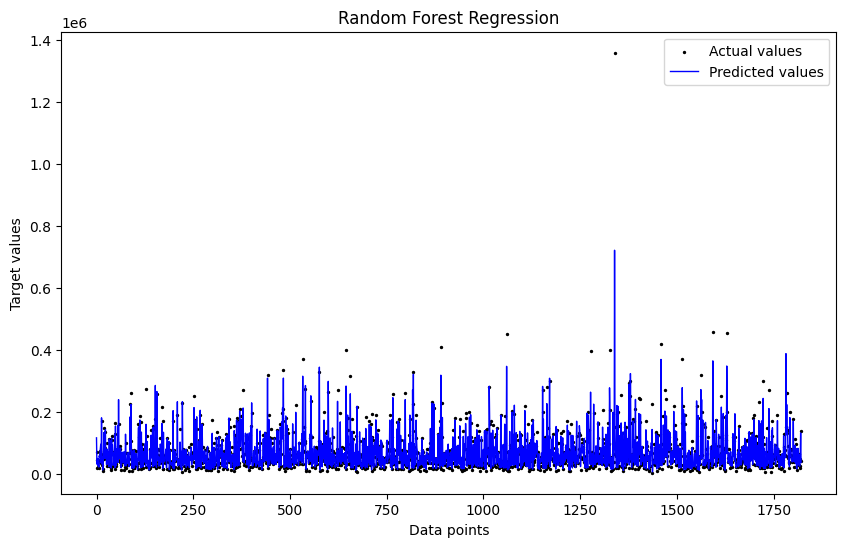

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_test, color='black', label='Actual values', s=2)
plt.plot(x_values, y_pred, color='blue', linewidth=1, label='Predicted values')
plt.title('Random Forest Regression')
plt.xlabel('Data points')
plt.ylabel('Target values')
plt.legend()
plt.show()

In [ ]:
print('RandomForestRegressor Accuracy Evaluation')
print(f'r2 score: {r2_score(y_test, random_forest.predict(x_test))}')
print(f'Mean absolute error: {mean_absolute_error(y_test, random_forest.predict(x_test))}')
print(f'Mean squared error: {mean_squared_error(y_test, random_forest.predict(x_test))}')

RandomForestRegressor Accuracy Evaluation
r2 score: 0.8740982053294674
Mean absolute error: 10033.164196853275
Mean squared error: 554812345.6477298


In [ ]:
pip install scikit-learn


In [ ]:


# Define the threshold based on the problem context
threshold = 0.5

# Convert the problem into a binary classification problem
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (random_forest.predict(x_test) > threshold).astype(int)

# Compute confusion matrix and F1 score
cm = confusion_matrix(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("Confusion Matrix:")
print(cm)
print(f"F1 Score: {f1}")


Confusion Matrix:
[[1822]]
F1 Score: 1.0


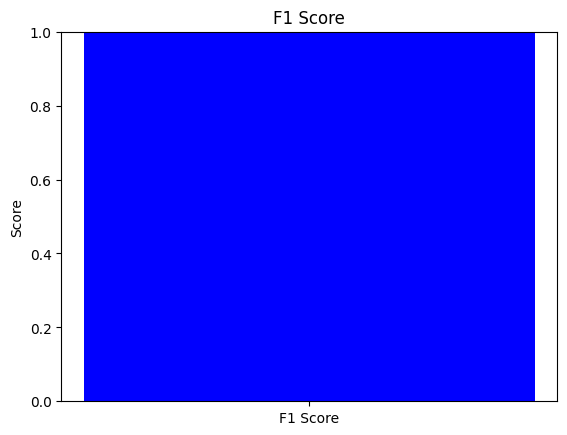

In [ ]:
labels = ['F1 Score']
scores = [f1]
plt.bar(labels, scores, color='blue')
plt.title('F1 Score')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.show()

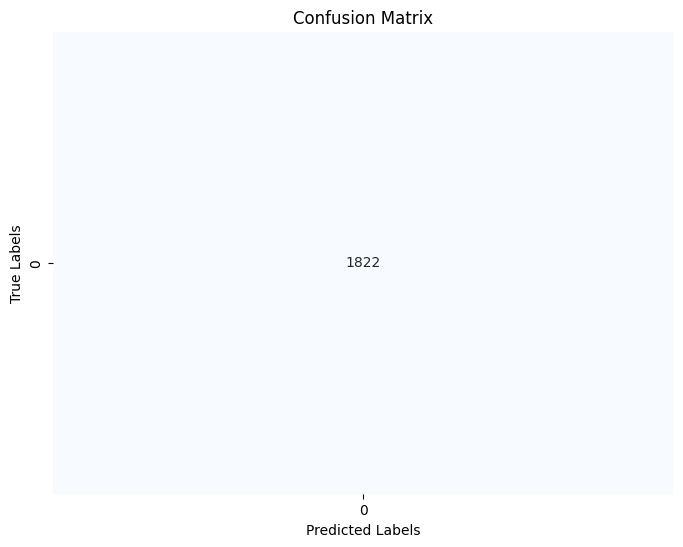

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Bagging regression model

In [ ]:
bagging = BaggingRegressor(n_estimators = 200, oob_score = True, n_jobs = 10)
bagging.fit(x_train, y_train.values.ravel())
bagging.score(x_train,y_train), bagging.score(x_test,y_test)

(0.9853094335029542, 0.8750524970486572)

In [ ]:
x_values = np.arange(len(y_test))
y_pred = bagging.predict(x_test)


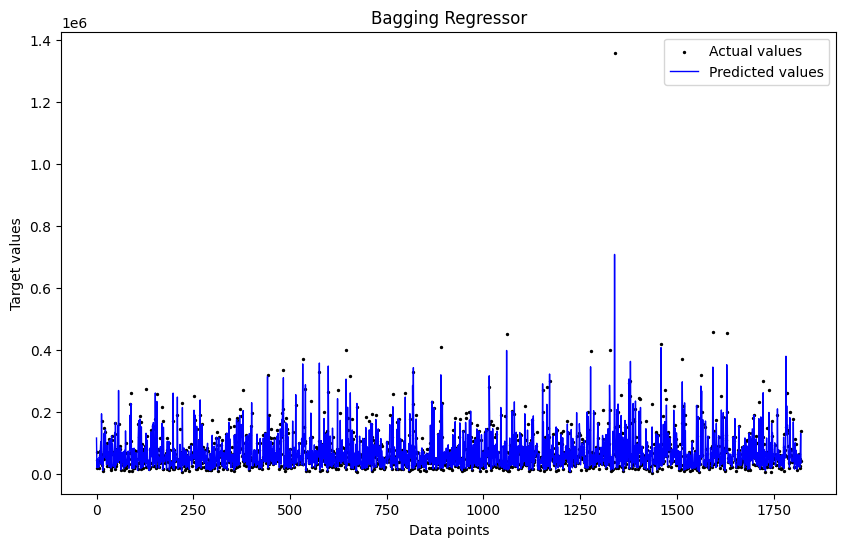

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_test, color='black', label='Actual values', s=2)
plt.plot(x_values, y_pred, color='blue', linewidth=1, label='Predicted values')
plt.title('Bagging Regressor')
plt.xlabel('Data points')
plt.ylabel('Target values')
plt.legend()
plt.show()

In [ ]:
print('BaggingRegressor Accuracy Evaluation')
print(f'r2 score: {r2_score(y_test, bagging.predict(x_test))}')
print(f'Mean absolute error: {mean_absolute_error(y_test, bagging.predict(x_test))}')
print(f'Mean squared error: {mean_squared_error(y_test, bagging.predict(x_test))}')

BaggingRegressor Accuracy Evaluation
r2 score: 0.8750524970486572
Mean absolute error: 9659.315570801316
Mean squared error: 550607061.4534781


In [ ]:
threshold = 0.5

# Convert the problem into a binary classification problem
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (bagging.predict(x_test) > threshold).astype(int)

# Compute confusion matrix and F1 score
cm = confusion_matrix(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("Confusion Matrix:")
print(cm)
print(f"F1 Score: {f1}")

Confusion Matrix:
[[1822]]
F1 Score: 1.0


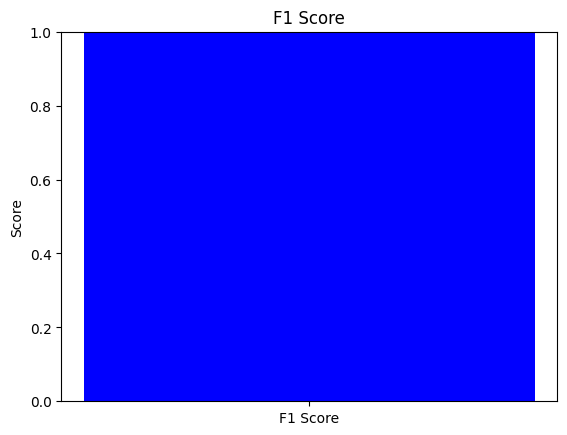

In [ ]:
labels = ['F1 Score']
scores = [f1]
plt.bar(labels, scores, color='blue')
plt.title('F1 Score')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.show()

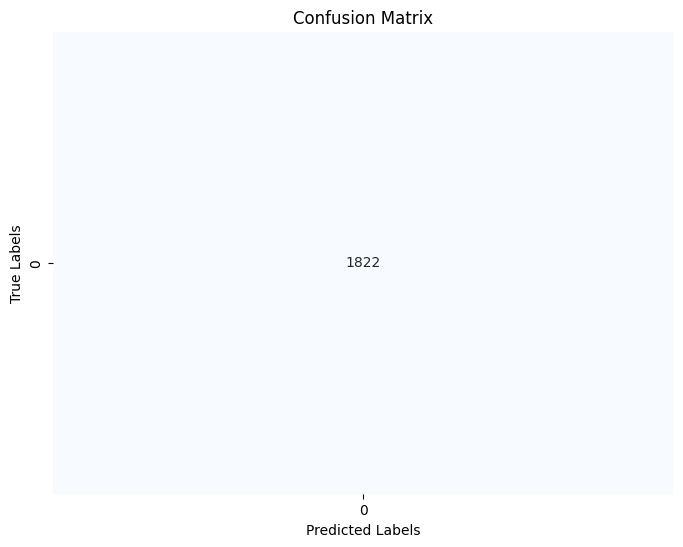

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
etr = ExtraTreesRegressor(random_state=0, n_estimators = 250, max_features = None, min_samples_split = 6)
etr.fit(x_train, y_train.values.ravel())
etr.score(x_train,y_train), etr.score(x_test,y_test)

(0.990297906654056, 0.8707240410469842)

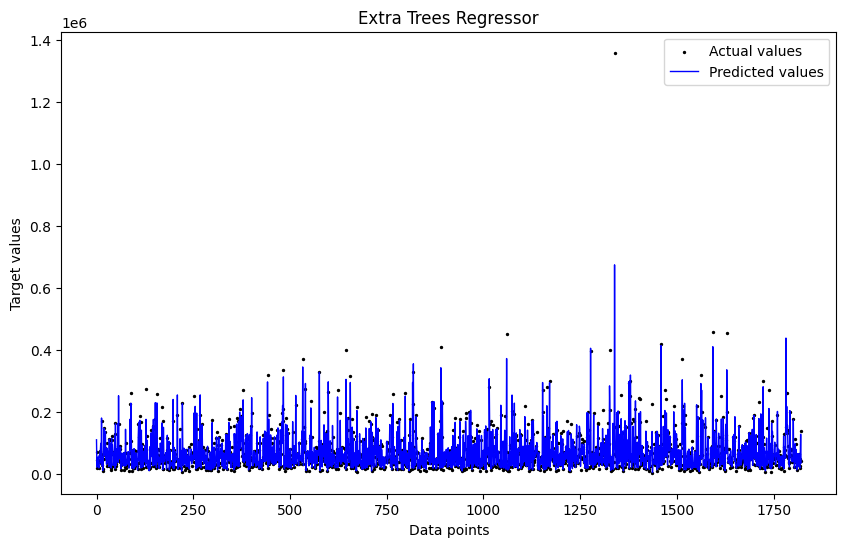

In [ ]:
x_values = np.arange(len(y_test))
y_pred = etr.predict(x_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_test, color='black', label='Actual values', s=2)
plt.plot(x_values, y_pred, color='blue', linewidth=1, label='Predicted values')
plt.title('Extra Trees Regressor')
plt.xlabel('Data points')
plt.ylabel('Target values')
plt.legend()
plt.show()

In [ ]:

print('ExtraTreesRegressor Accuracy Evaluation')
print(f'r2 score: {r2_score(y_test, etr.predict(x_test))}')
print(f'Mean absolute error: {mean_absolute_error(y_test, etr.predict(x_test))}')
print(f'Mean squared error: {mean_squared_error(y_test, etr.predict(x_test))}')

ExtraTreesRegressor Accuracy Evaluation
r2 score: 0.8707240410469842
Mean absolute error: 9676.502689828027
Mean squared error: 569681299.7008799


In [ ]:
threshold = 0.5

# Convert the problem into a binary classification problem
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (etr.predict(x_test) > threshold).astype(int)

# Compute confusion matrix and F1 score
cm = confusion_matrix(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("Confusion Matrix:")
print(cm)
print(f"F1 Score: {f1}")

Confusion Matrix:
[[1822]]
F1 Score: 1.0


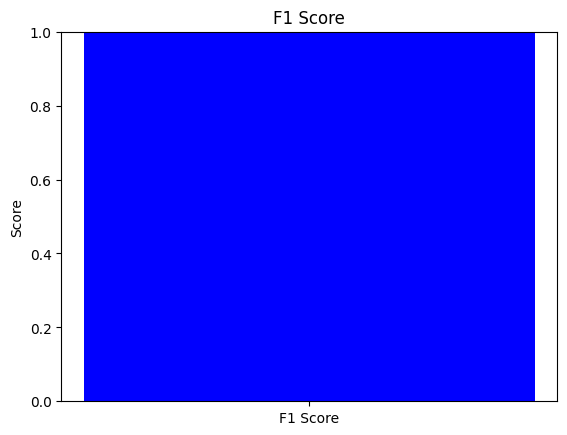

In [ ]:
labels = ['F1 Score']
scores = [f1]
plt.bar(labels, scores, color='blue')
plt.title('F1 Score')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.show()

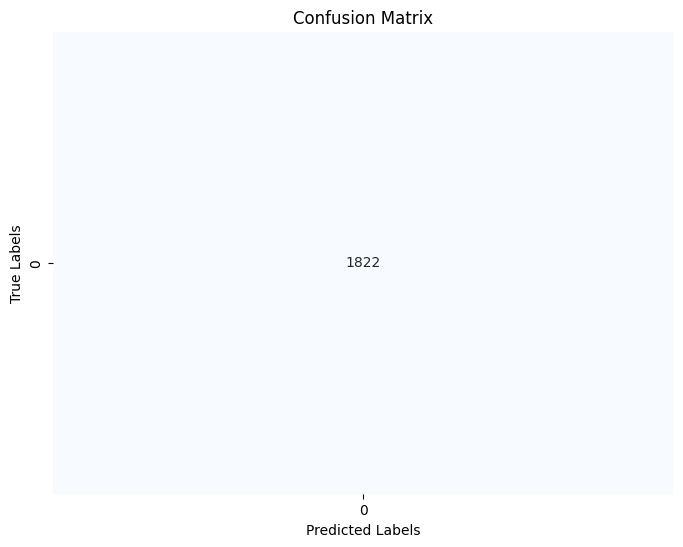

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
etr_values = cross_val_score(etr, x, y.values.ravel(), cv=4)
bagging_values = cross_val_score(bagging, x, y.values.ravel(), cv=4)
random_forest_values = cross_val_score(random_forest, x, y.values.ravel(), cv=4)
print(f"ExtraTreesRegressor model has accuracy{etr_values} ")
print(f"BaggingRegressor model has accuracy{bagging_values}  ")
print(f"RandomForestRegressor model has accuracy{random_forest_values} ")

ExtraTreesRegressor model has accuracy[0.84975666 0.794496   0.7099371  0.85777421] 
BaggingRegressor model has accuracy[0.84042939 0.81006913 0.73407804 0.80529097]  
RandomForestRegressor model has accuracy[0.83953644 0.78093277 0.62443347 0.81975738] 


In [ ]:
gbm = lgb.train(params,lgb_train,valid_sets=lgb_eval)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 7285, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 68433.891283


In [ ]:
print(etr.score(x_train, y_train), etr.score(x_test, y_test))

0.990297906654056 0.8707240410469842


In [ ]:
predicted = etr.predict(x_test)

In [ ]:
dtr = DecisionTreeRegressor(random_state=0, max_depth=1000, min_samples_split = 18, min_impurity_decrease = 1.4)
dtr.fit(x_train, y_train.values.ravel())
dtr.score(x_train,y_train), dtr.score(x_test,y_test)

(0.9424669521944536, 0.8156117034194138)

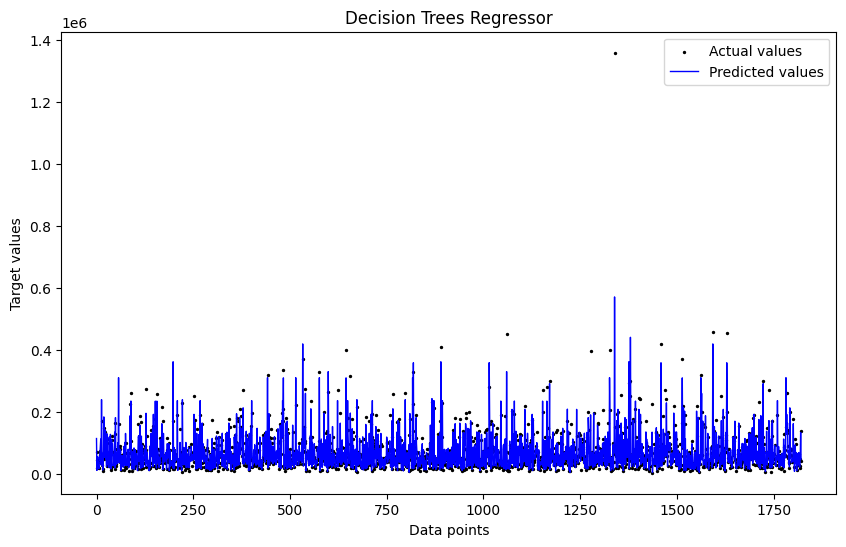

In [ ]:
x_values = np.arange(len(y_test))
y_pred = dtr.predict(x_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_test, color='black', label='Actual values', s=2)
plt.plot(x_values, y_pred, color='blue', linewidth=1, label='Predicted values')
plt.title('Decision Trees Regressor')
plt.xlabel('Data points')
plt.ylabel('Target values')
plt.legend()
plt.show()

In [ ]:

print('DecisionTreeRegressor Accuracy Evaluation')
print(f'r2 score: {r2_score(y_test, dtr.predict(x_test))}')
print(f'Mean absolute error: {mean_absolute_error(y_test, dtr.predict(x_test))}')
print(f'Mean squared error: {mean_squared_error(y_test, dtr.predict(x_test))}')

DecisionTreeRegressor Accuracy Evaluation
r2 score: 0.8156117034194138
Mean absolute error: 12482.489722434222
Mean squared error: 812545234.98709


In [ ]:
threshold = 0.5

# Convert the problem into a binary classification problem
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (dtr.predict(x_test) > threshold).astype(int)

# Compute confusion matrix and F1 score
cm = confusion_matrix(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("Confusion Matrix:")
print(cm)
print(f"F1 Score: {f1}")

Confusion Matrix:
[[1822]]
F1 Score: 1.0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
random_forest = RandomForestRegressor(n_estimators=250, max_features='sqrt', n_jobs=20)
random_forest.fit(x_train, y_train.values.ravel())

bagging = BaggingRegressor(n_estimators=200, oob_score=True, n_jobs=10)
bagging.fit(x_train, y_train.values.ravel())

etr = ExtraTreesRegressor(random_state=0, n_estimators=250, max_features=None, min_samples_split=6)
etr.fit(x_train, y_train.values.ravel())

ExtraTreesRegressor(max_features=None, min_samples_split=6, n_estimators=250,
                    random_state=0)

In [ ]:
y_rf = random_forest.predict(x_test)
y_bagging = bagging.predict(x_test)
y_etr = etr.predict(x_test)

In [ ]:
y_test_bin = label_binarize(y_test, classes=sorted(list(set(y_test))))

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = y_test_bin.shape[1]

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_rf)
    roc_auc[i] = auc(fpr[i], tpr[i])

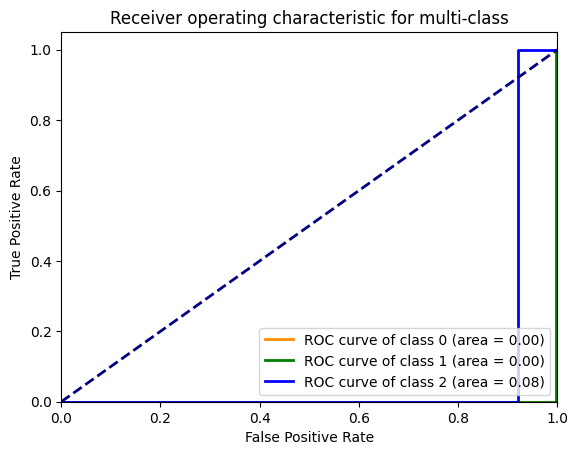

In [ ]:
plt.figure()
colors = ['darkorange', 'green', 'blue']  # You can add more colors for more classes
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
rf_train_score = random_forest.score(x_train, y_train)
rf_test_score = random_forest.score(x_test, y_test)
bagging_train_score = bagging.score(x_train, y_train)
bagging_test_score = bagging.score(x_test, y_test)
etr_train_score = etr.score(x_train, y_train)
etr_test_score = etr.score(x_test, y_test)

In [ ]:
labels = ['Random Forest', 'Bagging', 'Extra Trees']
train_scores = [rf_train_score, bagging_train_score, etr_train_score]
test_scores = [rf_test_score, bagging_test_score, etr_test_score]

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

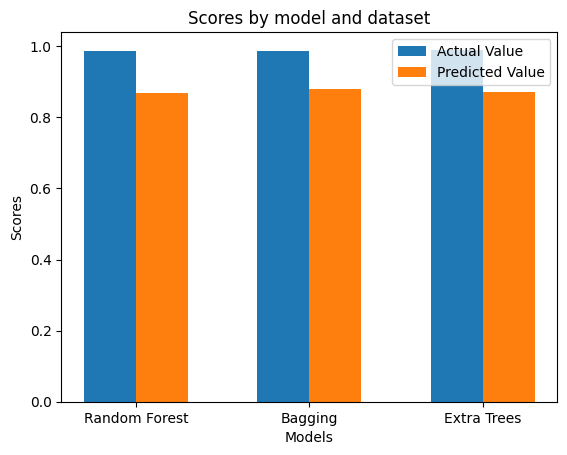

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, train_scores, width, label='Actual Value')
rects2 = ax.bar(x + width / 2, test_scores, width, label='Predicted Value')
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Scores by model and dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('scores_comparison.png')

